<a href="https://colab.research.google.com/github/arvynathaniel/Python/blob/main/Hass_Avocado_Sales_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploratory Data Analysis and Data Visualization of Hass Avocado Sales**

In this project, we will be looking at a dataset containing sales and average price of hass avocado. The main goal is to perform an exploratory data analysis (EDA) and visualizing the data, so that we can deduct some insights regarding the data and make a report for the executive team.

The main work sequence that will be conducted in this project are as follow:


1.   Calling in the dataset and various libraries needed to process the data
2.   Performing exploratory data analysis (EDA) and data visualization to get a picture of the data relationship
3.   Performing feature engineering (if needed) and visualizing the data




Before we begin the analysis, thanks to the provider of this dataset that has made our job easier by compiling the data from reliable sources and made it available for us to download. Accordingly, this project will not involve the data scraping part where we have to search for and scrape the data from various sources.

Data source: https://www.kaggle.com/datasets/neuromusic/avocado-prices

##**I. Calling in the dataset and various libraries needed to do the project**

In [3]:
# pandas will help us in visualizing and manipulating the data in a tabular form
import pandas as pd

# numpy and scipy will help us in performing mathematical operations on the data array
import numpy as np

# seaborn and matplotlib will help us in data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# calling in the dataset
data = pd.read_csv('avocado.csv')

##**II. Performing Exploratory Data Analysis**

###**IIa. Light data exploration**

#### a. General overview of the dataset

In [5]:
# First 5 rows of the dataset
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27/12/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20/12/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13/12/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29/11/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
# General information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Regarding the column names of the dataset, the provider of this dataset previously gave us a clue about what data each column represent:


*   Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
*   Region - the city or region of the observation
*   Total Volume - Total number of avocados sold
*   4046 - Total number of avocados with PLU 4046 sold
*   4225 - Total number of avocados with PLU 4225 sold
*   4770 - Total number of avocados with PLU 4770 sold

#### b. Missing values

In [7]:
# checking missing values on each feature
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### c. Unique values

In [8]:
# checking how many unique values there are in each feature of the dataset
for col in data.columns:
    print('Unique values in {} :'.format(col) + '\033[0m',len(data[col].unique()))

Unique values in Unnamed: 0 : 53
Unique values in Date : 169
Unique values in AveragePrice : 259
Unique values in Total Volume : 18237
Unique values in 4046 : 17702
Unique values in 4225 : 18103
Unique values in 4770 : 12071
Unique values in Total Bags : 18097
Unique values in Small Bags : 17321
Unique values in Large Bags : 15082
Unique values in XLarge Bags : 5588
Unique values in type : 2
Unique values in year : 4
Unique values in region : 54


#### d. Duplicated values

In [9]:
# checking if there are any duplicated values in the dataset
data.duplicated().sum()

0

#### e. Insights gathered

Things we get from this light data exploration:
1. The dataset contains mostly of numerical data.
2. There are 18249 entries
3. There are no missing values in the dataset (which is a good thing!)
4. There are no duplicated values in the dataset

###**IIb. Data Correlation**

#### a. Correlation heatmap

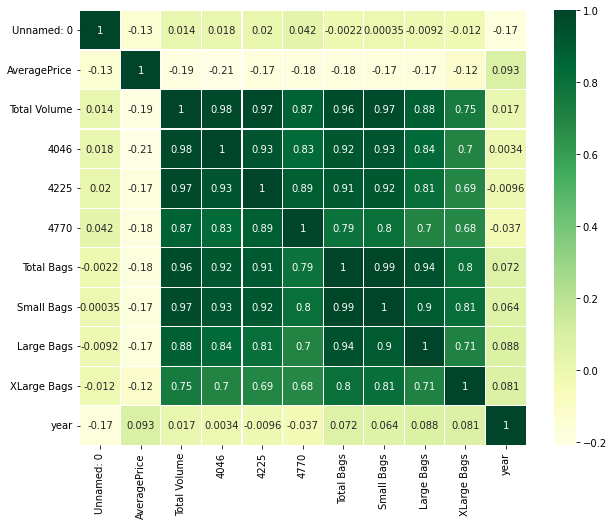

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), 
            annot = True, 
            linewidths = 0.1,
            cmap = 'YlGn');

#### b. Insights gathered

From the features correlation heatmap, there are some information we can gather.

Some notes to take before we start gathering insights from the features correlation heatmap:
1. The higher the number in the cells of the heatmap (higher value is highlighted by a brighter color) means that the correlation between the two features is stronger. 
2. Features '4046', '4225', and '4770' can be viewed as a feature group: PLU codes. 

## **III. Data Visualization (Using the Data As-Is)**

###**IIIa. Volume: Conventional vs. Organic**

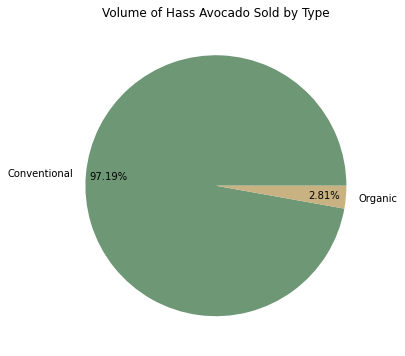

In [11]:
# pivoting the data
pivot_volume_type = pd.pivot_table(data,
                                   index = 'type',
                                   values = 'Total Volume');

# Creating the data labels
labels = ['Conventional', 'Organic']

# Creating the color palette for further data visualizations
color_avocado = ['#6D9775', '#C8B282'] # '#6D9775' -> green
                                       # '#C8B282' -> beige-brown
    
# Creating pie plot
plt.figure(figsize = (8, 6))
plt.title('Volume of Hass Avocado Sold by Type')
ax = plt.pie(np.array(pivot_volume_type).ravel(),
             labels = labels,
             colors = color_avocado,
             autopct = '%.2f%%',
             pctdistance = 0.83);

###**IIIb. Average Price: Conventional vs. Organic**

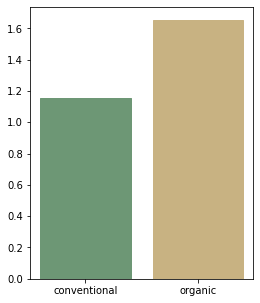

In [12]:
# Pivoting the data
a = pd.pivot_table(data,
                   index = 'type',
                   values = 'AveragePrice',
                   aggfunc = 'mean')
a = a.reset_index()

# Creating the bar plot
plt.figure(figsize = (4, 5))
fig = plt.bar(a['type'],
              a['AveragePrice'])
fig[0].set_color('#6D9775')
fig[1].set_color('#C8B282')

In [13]:
# Calculating the difference percentage between the two types
b = a.iloc[0, 1] # conventional avocado's average price
c = a.iloc[1, 1] # organic avocado's average price
d = '{:.2%}'.format((c-b)/c) # difference percentage
b = '${:,.2f}'.format(b) # changing format to currency
c = '${:,.2f}'.format(c) # changing format to currency
print("Conventional avocado's average price =", b)
print("Organic avocado's average price =", c)
print('Average price difference percentage =', d)

Conventional avocado's average price = $1.16
Organic avocado's average price = $1.65
Average price difference percentage = 29.99%


###**IIIc. Volume: Top 5 Areas**

#### Data Pivoting

In [14]:
# Dataset without the value 'TotalUS' in the feature 'region'
# 'TotalUS' need to be excluded because it's just the sum of the other regions
a = data[data['region'] != 'TotalUS']

# Pivoting the data for conventional avocados
pivot_volume_top5areas_conventional = pd.pivot_table(a[a.type == 'conventional'], 
                                                     index = 'region', 
                                                     values = 'Total Volume',
                                                     aggfunc = 'sum').sort_values(by=['Total Volume'],
                                                                                          ascending=False).head(5).sort_values(by=['Total Volume'],
                                                                                                                               ascending=True)

# Pivoting the data for organic avocados
pivot_volume_top5areas_organic = pd.pivot_table(a[a.type == 'organic'],
                                                index = 'region',
                                                values = 'Total Volume',
                                                aggfunc = 'sum').sort_values('Total Volume', 
                                                                                     ascending = False).head(5).sort_values(by=['Total Volume'],
                                                                                                                            ascending=True)

#### Bar plot: Total Volume - Top 5 Areas - Conventional Avocados

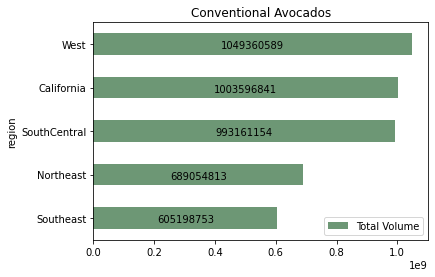

In [15]:
# Creating the bar plot
ax = pivot_volume_top5areas_conventional.plot.barh(color = '#6D9775')
plt.title('Conventional Avocados')

# Creating data labels
rects = ax.patches
labels = list(pivot_volume_top5areas_conventional['Total Volume'])
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.1,
             int(label),
             ha = 'center',
             va = 'bottom',
             color = 'black')

#### Bar plot: Total Volume - Top 5 Areas - Organic Avocados

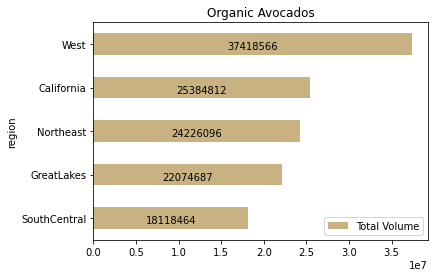

In [16]:
# Total Volume - Top 5 Areas - Organic Avocados

# Creating the bar plot
ax = pivot_volume_top5areas_organic.plot(kind = 'barh', color = '#C8B282')
plt.title('Organic Avocados')

# Creating the data labels
rects = ax.patches
labels = list(pivot_volume_top5areas_organic['Total Volume'])
for rect, label in zip(rects, labels):
    width = rect.get_width()
    plt.text(width / 2,
             rect.get_y() + 0.2,
             int(label),
             ha = 'center',
             va = 'center',
             color = 'black')

###**IIId. Volume: By Price Lookup Number (PLU)**

#### Bar plot: Conventional vs. Organic

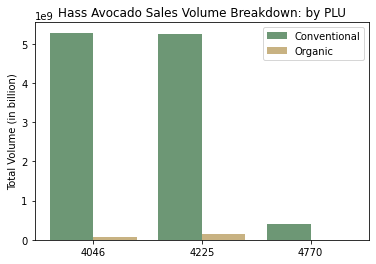

In [17]:
# Calculating each type of avocado's sum of each PLU
a = sum(data['4046'][data.type == 'conventional'])
b = sum(data['4225'][data.type == 'conventional'])
c = sum(data['4770'][data.type == 'conventional'])
d = sum(data['4046'][data.type == 'organic'])
e = sum(data['4225'][data.type == 'organic'])
f = sum(data['4770'][data.type == 'organic'])

# Storing the sums into lists
g = [a, b, c]
h = [d, e, f]

# Formatting the numbers in the lists
g = [round(num, 0) for num in g]
h = [round(num, 0) for num in h]

# Creating the PLU list
i = ['4046', '4225', '4770']

# Creating the bar plot
plt.title('Hass Avocado Sales Volume Breakdown: by PLU')
plt.ylabel('Total Volume (in billion)')
x = np.arange(len(i))
plt.bar(x - 0.2, 
        g, 
        width = 0.4, 
        label = 'Conventional', 
        color = '#6D9775')
plt.bar(x + 0.2, 
        h, 
        width = 0.4, 
        label = 'Organic', 
        color = '#C8B282')
plt.legend()

# x ticks
plt.xticks(x, i)

# Display
plt.show()

#### Pie plot: PLU Percentage

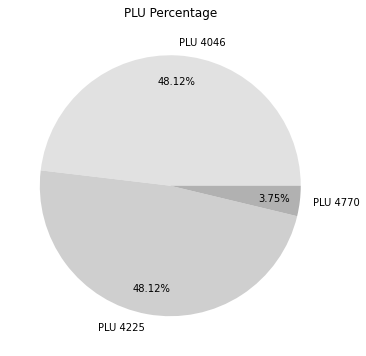

In [18]:
# Calculating the sum of each PLU
j = sum(data['4046'])
k = sum(data['4046'])
l = sum(data['4770'])

# Storing the sums into a list
m = [j, k, l]

# Formatting the numbers in the lists
n = [round(num, 0) for num in m]

# Creating the data labels
labels = ['PLU 4046', 'PLU 4225', 'PLU 4770']

# Creating the color palette
colors = ['#E1E1E1', '#CFCFCF', '#B1B1B1']

# Creating the pie plot
plt.figure(figsize = (8, 6))
plt.pie(n,
        labels = labels,
        colors = colors,
        autopct = '%.2f%%',
        pctdistance = 0.8);
plt.title('PLU Percentage');

###**IIIe. Volume: By Bag Size**

#### Bar plot: Conventional vs. Organic

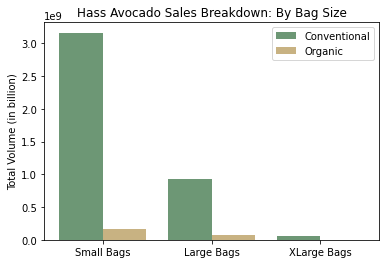

In [19]:
# Calculating each type of avocado's sum of each bag
a = sum(data['Small Bags'][data.type == 'conventional'])
b = sum(data['Large Bags'][data.type == 'conventional'])
c = sum(data['XLarge Bags'][data.type == 'conventional'])
d = sum(data['Small Bags'][data.type == 'organic'])
e = sum(data['Large Bags'][data.type == 'organic'])
f = sum(data['XLarge Bags'][data.type == 'organic'])

# Storing the sums into lists
g = [a, b, c] # Bag Sizes for the 'Conventional' avocados
h = [d, e, f] # Bag Sizes for the 'Organic' avocados

# Eliminating the decimals in the lists
g = [round(num, 0) for num in g]
h = [round(num, 0) for num in h]

# Creating the bag size list
i = ['Small Bags', 'Large Bags', 'XLarge Bags']

# Creating the bar plot
plt.title('Hass Avocado Sales Breakdown: By Bag Size')
plt.ylabel('Total Volume (in billion)')
x = np.arange(len(i))
plt.bar(x - 0.2, 
        g, width = 0.4, 
        label = 'Conventional', 
        color = '#6D9775')
plt.bar(x + 0.2, 
        h, 
        width = 0.4, 
        label = 'Organic', 
        color = '#C8B282')
plt.legend()

# x Ticks
plt.xticks(x, i)

# Display
plt.show()

#### Pie plot: Bag Size Percentage

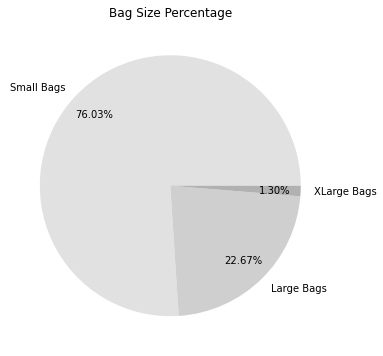

In [20]:
# Calculating the sum of each bag size
j = sum(data['Small Bags'])
k = sum(data['Large Bags'])
l = sum(data['XLarge Bags'])

# Storing the sums in a list
m = [j, k, l]

# Creating the labels
labels = ['Small Bags', 'Large Bags', 'XLarge Bags']

# Creating the color palette
colors = ['#E1E1E1', '#CFCFCF', '#B1B1B1']

# Creating the pie plot
plt.figure(figsize = (8, 6))
plt.pie(m,
        labels = labels,
        colors = colors,
        autopct = '%.2f%%',
        pctdistance = 0.8);
plt.title('Bag Size Percentage');

###**IIIf. Timeline: Average Price and Total Volume**

In [21]:
data['Date']

0        27/12/2015
1        20/12/2015
2        13/12/2015
3        06/12/2015
4        29/11/2015
            ...    
18244    04/02/2018
18245    28/01/2018
18246    21/01/2018
18247    14/01/2018
18248    07/01/2018
Name: Date, Length: 18249, dtype: object

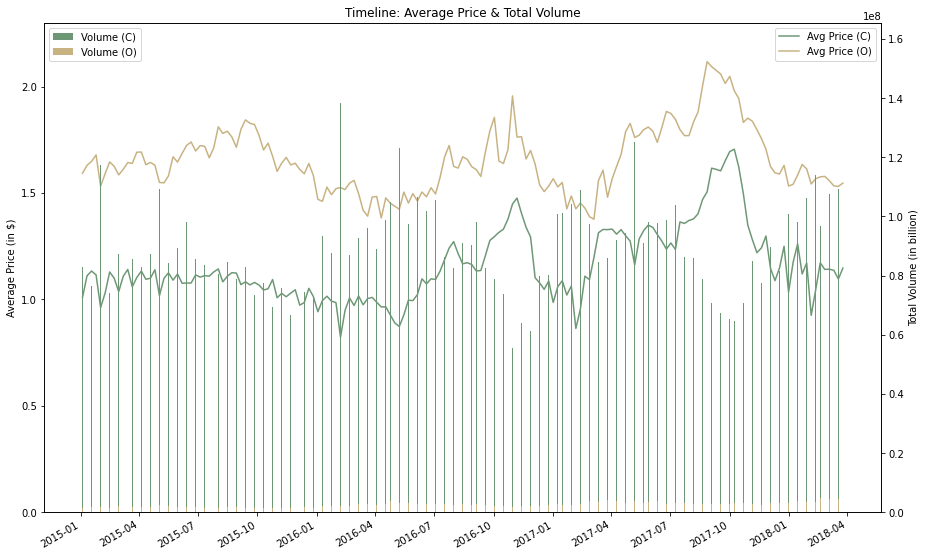

In [22]:
# Converting the Date feature into the date format
data['DateFormatted'] = pd.to_datetime(data['Date'], dayfirst = True)
a = data['DateFormatted']
b = data['Total Volume']

import matplotlib.dates as mdates
month_separator = mdates.MonthLocator(interval = 3)
year_month_formatter = mdates.DateFormatter("%Y-%m")

# Turning the formatted date into a list

# Pivoting the data
d = pd.pivot_table(data[data.type == 'conventional'],
                   index = 'DateFormatted',
                   values = 'Total Volume',
                   aggfunc = 'sum') 
e = pd.pivot_table(data[data.type == 'conventional'], 
                   index = 'DateFormatted', 
                   values = 'AveragePrice',
                   aggfunc = 'mean')
f = pd.pivot_table(data[data.type == 'organic'],
                   index = 'DateFormatted',
                   values = 'Total Volume',
                   aggfunc = 'sum')
g = pd.pivot_table(data[data.type == 'organic'],
                   index = 'DateFormatted',
                   values = 'AveragePrice',
                   aggfunc = 'mean')

# Resetting the pivot table into dataframe format
d = d.reset_index()
e = e.reset_index()
f = f.reset_index()
g = g.reset_index()

# Concatenating the pivot tables
h = d['DateFormatted']
i = d['Total Volume']
j = e['AveragePrice']
k = f['Total Volume']
l = g['AveragePrice']
m = pd.DataFrame(list(zip(h, i, j, k, l)))
m.columns = ['Date', 'Volume (C)', 'Avg Price (C)', 'Volume (O)', 'Avg Price (O)']

# Creating the chart field
fig = plt.figure(figsize=(15, 10))

# Creating the y-axis
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# Plotting the data into the combo chart
# Average Price
ax1.plot(list(m['Date']), 
         list(m['Avg Price (C)']), 
         label = 'Avg Price (C)', 
         color = '#6D9775')
ax1.plot(list(m['Date']), 
         list(m['Avg Price (O)']), 
         label = 'Avg Price (O)', 
         color = '#C8B282')
ax1.set_ylabel('Average Price (in $)')
ax1.set_ylim(0, 2.3)
# Total Volume
ax2.bar(list(m['Date']), 
        list(m['Volume (C)']), 
        label = 'Volume (C)', 
        color = '#6D9775')
ax2.bar(list(m['Date']), 
        list(m['Volume (O)']), 
        label = 'Volume (O)', 
        color = '#C8B282')
ax2.set_ylabel('Total Volume (in billion)')
ax2.set_ylim(0, max(m['Volume (C)']) + 0.2)

# Configurating the x-tick interval and date format
ax1.xaxis.set_major_locator(month_separator)
ax1.xaxis.set_major_formatter(year_month_formatter)
fig.autofmt_xdate()

# Chart Title
plt.title('Timeline: Average Price & Total Volume');

# Showing the combo chart and its legend
ax1.legend()
ax2.legend()
plt.show()

###**IIIg. Volume: Quarterly Breakdown**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


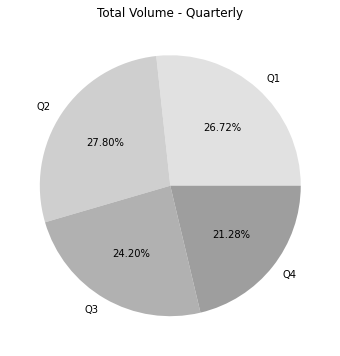

In [23]:
# Dropping the rows where the date is in 2018
# These rows need to be dropped since the data in 2018 only spans from Jan to Mar
import datetime as dt
data2 = data[data['DateFormatted'].dt.year != 2018]

# Grouping the data based on the Date feature quarterly
data2['Quarter'] = data2['DateFormatted'].dt.quarter

# Pivotting the data
a = pd.pivot_table(data2, 
                   index = 'Quarter', 
                   values = 'Total Volume');

# Creating the data labels
labels = ['Q1', 'Q2', 'Q3', 'Q4']

# Creating the color palette
color_quarterly = ['#E1E1E1', '#CFCFCF', '#B1B1B1', '#9E9E9E']

# Creating the pie plot
plt.figure(figsize = (8, 6))
plt.title('Total Volume - Quarterly')
ax = plt.pie(np.array(a).ravel(),
             colors = color_quarterly,
             labels = labels,
             autopct = '%.2f%%',
             pctdistance = 0.6,
             textprops = {'color': 'black'});   

###**IIIh. Volume: Monthly**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


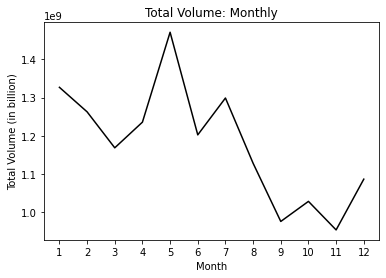

In [24]:
# Grouping the data based on Date feature monthly
data2['Monthly'] = data2['DateFormatted'].dt.month

# Pivoting the data
a = pd.pivot_table(data2,
                   index = 'Monthly',
                   values = 'Total Volume',
                   aggfunc = 'sum')
b = a.reset_index()

# Creating the line plot
x = b['Monthly']      # Defining the x-axis data
y = b['Total Volume'] # Defining the y-axis data
plt.plot(x, y, color = 'black');
plt.xticks(np.arange(min(x), max(x) + 1, 1));
plt.title('Total Volume: Monthly');
plt.xlabel('Month');
plt.ylabel('Total Volume (in billion)');

###**IIIi. Insights Gathered**

From the previous data visualizations, there are some insights that can be gathered:
1. Conventional avocado's total volume dominates the market, with a portion of 97.19%.
2. The average price of conventional avocado is 29.99% lower than that of organic avocado's.
3. 'West' and 'California' regions dominate the sales of hass avocado, in both types of the avocado, with 'West' being the higher between the two regions.
4. PLU 4046 and PLU 4225 dominates the market, sharing a same portion, with each of 48.12%. Avocados with PLU 4770 might be the least favorite out of the three.
5. Small bag size dominates the market with a portion of 76.03%.
6. The average price of the avocado displays a somewhat cyclic pattern, with April being the start of the increase in the average price up until October. From October, it starts to decline again.
7. The average price and total volume displays a common market principle, where the increase of price is followed by a decrease in purchase. This may give an indication that when time comes around the winter season, it is not really suitable for avocados to grow, causing a decline in supply. This decrease in supply causes the avocado price to surge, leading to decline in total volume sales.
8. From 2015 to 2017, May is the month when the total volume of avocados sold is the highest.
9. From 2015 to 2017, the fourth quarter is when the total volume of avocados sold is the lowest, with November in particular being the month with the lowest. A possible explanation is that avocados possibly do not do well in cold season, since the weather might damage the fruit, turning them to black in color.

##**IV. Feature Engineering: Revenue**

Aside from the insights we have gathered from the data presented in the dataset, we can also get an idea about how much gross revenue the sales of hass avocado have generated based on the 'Total Volume' and 'Average Price' features, following a relatively simple relation: 

'Revenue' = 'Total Volume' x 'Average Price' 

It is important to take note that this is only an approach based on the average price, so some differences from the actual revenue are to be expected. This is only to get an idea roughly how much sales were generated based on the data.

###**IVa. Total Revenue**

In [25]:
# Calculating the new feature: 'Revenue'
data['Revenue'] = data['Total Volume'] * data['AveragePrice']

# Calculating the sum of Revenue
a = sum(data['Revenue'])
print('Total Revenue =', '${:,.2f}'.format(a))

Total Revenue = $16,934,130,966.87


###**IVb. Bar Plot: Revenue by Type**

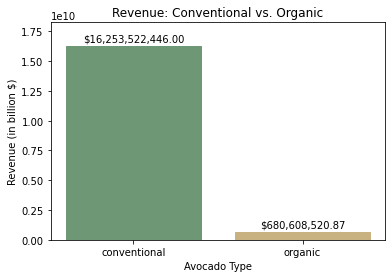

In [26]:
# Pivoting the data
a = pd.pivot_table(data,
                   index = 'type',
                   values = 'Revenue',
                   aggfunc = 'sum')
b = a.reset_index()

# Creating the color palette
colors = ['#6D9775', '#C8B282']

# Creating the bar chart
fig, ax = plt.subplots()
ax.set_title('Revenue: Conventional vs. Organic')
ax.set_xlabel('Avocado Type')
ax.set_ylabel('Revenue (in billion $)')
x = b['type']
y = b['Revenue']
figure = plt.bar(x, y)
figure[0].set_color('#6D9775')
figure[1].set_color('#C8B282')

# Creating and placing the data labels
c = [b.iloc[0, 1], b.iloc[1, 1]]
labels = ['${:,.2f}'.format(label) for label in c]
rects = ax.patches
for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2,
             height + 200000000,
             str(label),
             ha = 'center',
             va = 'bottom')
ax.set_ylim(0, max(y) + 2000000000);

###**IVc. Pie Plot: Revenue by Type**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


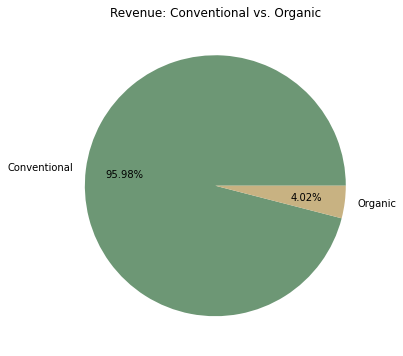

In [27]:
# Creating the labels
labels = ['Conventional', 'Organic']

# Creating the pie plot
plt.figure(figsize = (8,6))
plt.title('Revenue: Conventional vs. Organic')
plt.pie(a,
        labels = labels,
        colors = colors,
        autopct = '%.2f%%',
        pctdistance = 0.7);

###**IVd. Insights**

Some insights that can be gathered from the 'Revenue' feature:
1. The estimated total gross revenue generated from the hass avocado sales is ```$```16,934,130,966.87
2. Organic avocado has higher average price compared to conventional avocado (```$```1.65 to ```$```1.16). However, since the total volume of organic avocado is significantly smaller than that of conventional avocado's (97.19% to 2.81%), the percentage of the revenue generated by organic avocado sales also does not take a significant portion (4.02% of the total revenue).